2025-06-23 03:13:32.867398: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


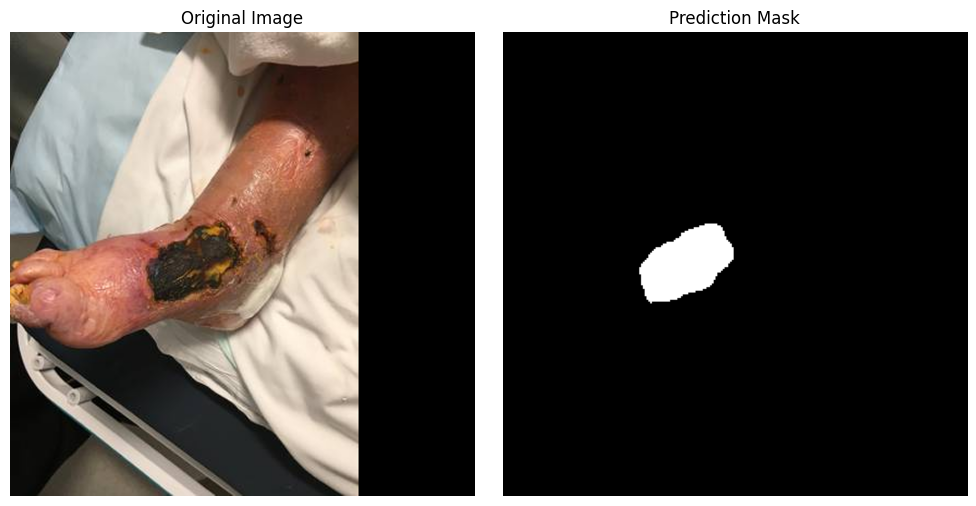

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/kaggle/input/unetdfusegmentation/keras/default/1/unet_wound_segmentation_model.h5', custom_objects={'dice_coefficient': dice_coefficient, 'iou_metric': iou_metric})

def preprocess_image(image_path, target_size=(256, 256)):
    """
    Load and preprocess an image for prediction.

    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size for resizing the image. Default is (256, 256).

    Returns:
        np.array: Preprocessed image.
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize to target size
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def display_prediction(image_path, model):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Generate prediction
    prediction = model.predict(image)
    prediction_mask = (prediction.squeeze() > 0.5).astype(np.uint8)  # Apply threshold (0.5)

    # Load the original image for display
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Display the original image and the prediction
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(prediction_mask, cmap='gray')
    plt.title('Prediction Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Test the model on a new image
test_image_path = '/kaggle/input/wound-segmentation-images/data_wound_seg/test_images/fusc_0021.png'  
display_prediction(test_image_path, model)